

# AutoEncoders for Dimensionality Reduction

#### We will showcase a simple example of how autoencoders can help to reduce noise in the data by reducing the dimensionality. 

#### Imports

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Creating a data set with 300 data points 2 features and two clusters

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data #X is the dataset and y are the labels

In [11]:
features = pd.DataFrame(X,columns=['X1','X2'])

In [12]:
features

,X1,X2
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


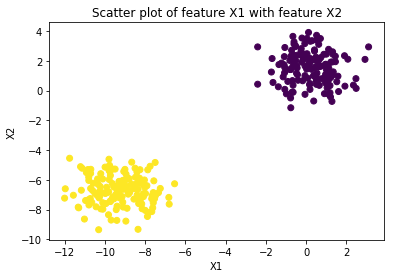

In [17]:
plt.title('Scatter plot of feature X1 with feature X2')
plt.xlabel('X1')
plt.ylabel('X2')

plt.scatter(features['X1'],features['X2'],c=y)

#We can clearly see the two clusters in this scatter plots.
#As mentioned above, this dataset is of two clusters

#### Now we will be adding noise to the data

In [18]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [19]:
features = pd.DataFrame(X)
features = pd.concat([features,z_noise],axis=1)
features.columns = ['X1','X2','X3']

In [21]:
features.head() # Now we have three features for our 300 data points. 
                # Two of them are actual features and one (X3) is plain noise.

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


#### Let's try to look at these three features in a 3D graph to see how the scatter plot looks

In [22]:
from mpl_toolkits.mplot3d import Axes3D

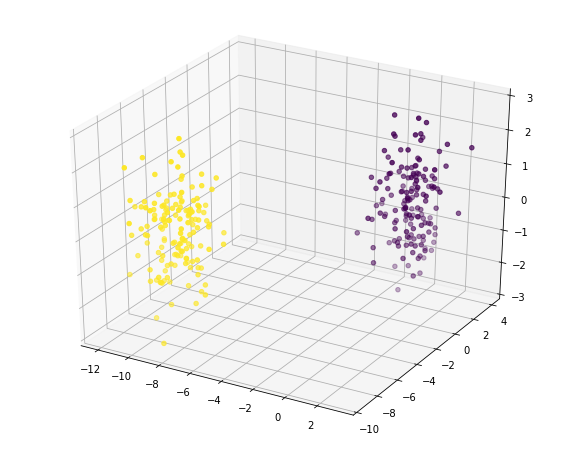

In [33]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['X1'],features['X2'],features['X3'],c=y)

In [ ]:
# It can easily been seen how the third feature i.e. X3 just adds noise to the data.
# Comparing it to the previos scatter plot, there is nothing new that X3 variable tells
# us about the data. 

#### Now with the help of an autoencoder we will try to get rid of this noise in the data by reducing the number of dimenions (features) from 3 to 2. And we'll see how well our autoencoder performs in doing that

# Encoder and Decoder

#### Imports

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#### The first part of autoencoder > Encoder --> From 3 features to 2 features

In [61]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

#### Second part of autoencoder > Decoder --> From 2 features to back to 3 features

In [62]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

#### Autoencoder

In [63]:
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

#### Normalising our data set

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features)

In [66]:
autoencoder.fit(scaled_data,scaled_data,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2485
Epoch 2/10
10/10 [==============================] - 0s 1ms/step - loss: 0.2475
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 0.2595
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1155
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1268
Epoch 7/10
10/10 [==============================] - 0s 1ms/step - loss: 0.1306
Epoch 8/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1060
Epoch 9/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1159
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0994


In [67]:
# Making pedictions i.e converting our 3 dimensions to 2 dimensions!

In [68]:
encoded_2dim = encoder.predict(scaled_data)

In [69]:
#### Let us visually see if our autuencoder did a good job in reducing the noise in the data

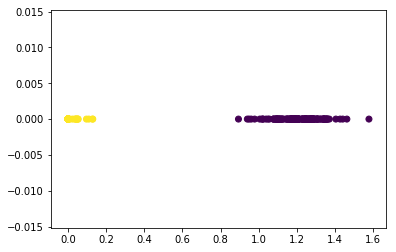

In [70]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)

### Looks like we were able to reduce noise in our data by reducing the dimensionality of our data using an autoencoder!